# All Hail Transformers: Rise of Large Language Models.

***All matter originates and exists only by virtue of a force... We must assume behind this force the existence of a conscious and intelligent Mind. This Mind is the matrix of all matter. -Max Planck***

***Machine Learning is Experimentation, not philosophy. -LazyProgrammer***

***You insist that there is something a machine cannot do. If you will tell me precisely what it is that a machine cannot do, then i can always make a machine which will do just that! -J Von. Neumann***

**

```
The Transformer

The encoder, a wise old sage,
With knowledge vast and deep.
The decoder, a young child's mind,
A blank slate, eager to learn.

The attention, a bridge between,
A pathway to connect.
The layers, a stack of wisdom,
A fortress to protect.

The heads, a multitude of eyes,
To see the world anew.
The model, a whole made up of parts,
A living, breathing thing.

So learn, as the transformer does,
From the sage, the encoder.
And grow, as the child does,
With the knowledge, the attention.

And build, as the layers do,
A stack of knowledge, a model.
And see, as the heads do,
The world in a new way.
```
## Welcome to Introductory Session of Learning Applied Generative AI Series.

This session includes:

- Theory and Implementation of Transformers according to the Paper "Attention is All you Need."
- Paper Link: https://arxiv.org/abs/1706.03762

Outline:

- From RNNs to Transformers.
- Anatomy of Transformer.
- Self-Attention in Transformer
- Multi-head attention
- Layer Normalization
- Residual Network/ Skip Connections
- Positional Encodings
- Encoder
- Decoder
- Encoder-Decoder/Seq2Seq Transformers
- Sparse Transformers
- Reformer: The Efficient Transformer
- Longformer: The Long-Document Transformer
- BERT(Bidirectional Encoder Representations for Transformers)
- GPT(Generative Pre-Trained Transformers)
- GPT-2
- GPT-3
- InstructGPT
- ChatGPT
- GPT-4


In [2]:
# Import Packages
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import dataset, DataLoader

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import load_dataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## From RNNs to Transformers.

- The "Attention Mechanism" allows neural networks to learn very long-range dependencies in sequences.
    - Longer Range than LSTM.
    - Attention was created for RNNs, but Transformers use Only Attention, and the recurrent part is removed completely.
- Computations in Transformers can be done parallely unlike RNNs.

### RNNs

![](https://media.geeksforgeeks.org/wp-content/uploads/20230518134831/What-is-Recurrent-Neural-Network.webp)

Problems with different RNN architecture.

1. Input sequence length != Target Sequence length
    - One Word → multiple words or vice versa.
2. Each output ŷ(t) depends only on h(t).
    - h(t) depends only on h(t-1) and x(t). Hence ŷ(t) depends on {x(1), x(2), ...., x(t)}
    - But order can be mixed up in different languages. For e.g. EN: "She is a smart girl", FR: "She is a girl smart".

### Seq2Seq

- 2 RNNs: Encoder and Decoder.

![](https://static.packt-cdn.com/products/9781788996921/graphics/assets/e3a27c9d-19a4-4b77-a737-ef6ae8dec474.png)

Problems:

- What if input is very long? The final encoder state h(T) always has the same size and has to remeber the whole input.

### Attention in Seq2Seq RNNs. **Bahdanau's Attention.**

- Intuition: For each OUTPUT token, we want to know which INPUT token(s) to pay attention to.

- Paper Link: https://arxiv.org/abs/1409.0473

Context Vector $c(t) = ∑_{t'=1}^{T_X}α(t, t')h(t')$

$α(t, t') = \frac{e^{score(t,t'}}{∑_{τ=1}^{T_x}e^{score(t, τ)}}$

$score(t, t') = ANN(s(t-1), h(t'))$

![](https://www.researchgate.net/publication/329464533/figure/fig3/AS:701043021197314@1544153089772/An-attention-based-seq2seq-model.ppm)

## Transformers Intuition from the paper.

- Transformers take inspiration from **Attention Mechanism** and **Convolutional filters.**

![](https://miro.medium.com/v2/resize:fit:1100/1*cfO8kMdUGG-X33TZa2h-vQ.gif)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*VfO7MkIaFC9vPIlj6P6uXQ.png)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*TEVKDVl-cTMfF2mWvfCtzg.png)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*yS7kngwne2hoNe-qdb0Wug.png)

- Bahdanau's Attention Map

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*hfFhnKuQCmZgdIb_WIs-SQ.png)

### Anatomy of Transformers Architecture.

![](https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1.png)

![](https://raw.githubusercontent.com/nlp-with-transformers/notebooks/884293a3ab50071aa2afd1329ecf4a24f0793333//images/chapter03_transformer-encoder-decoder.png)

![The Encoder](https://raw.githubusercontent.com/nlp-with-transformers/notebooks/884293a3ab50071aa2afd1329ecf4a24f0793333//images/chapter03_encoder-zoom.png)

![The Decoder](https://raw.githubusercontent.com/nlp-with-transformers/notebooks/884293a3ab50071aa2afd1329ecf4a24f0793333//images/chapter03_decoder-zoom.png)

![](https://raw.githubusercontent.com/nlp-with-transformers/notebooks/884293a3ab50071aa2afd1329ecf4a24f0793333//images/chapter03_transformers-compact.png)


## Self-Attention in Transformers.

$Attention(Q, K, V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$

### Intuition

- For each word in a sequence, calculate Attention-based Vector Representation. $A(q, k, v)$ = Attention-based vector representation.
- For e.g. "Bob cashed a check at the bank." will have $A^{<1>}.....A^{<7>}$ for 7 words.
- Consider, the word "bank", in above sentence. One way as previously seen is looking for the respective embedding. The other way(The Transformer's way) is to find the embedding depending on whether the word "bank" here represents a geographical feature(Like a river bank) or a financial instituion. You need context for this.
-That's what self-attention does, it looks to the other words in the sequence and find the modet appropriate representation for the word.
- Transformer Attention: $A(q, k, v) = ∑_{i}\frac{exp(q.k^{<i>})}{∑_{j}exp(q.k^{<j>})}v^{<i>}$

- Attention Weights
    - Dot product is like a measure of "similarity" or "affinity".
    - $x^Ty = ∑x_iy_i = ||x||||y||cos(x, y)$
    - If the length of x and y are 1, then it's just cos(x,y)
    - cos(x,y) is the cosine similarity between x and y.
    - Cosine Similarity is related to Pearson Correlation.
    - $cos(x, y) = \frac{∑_ix_iy_i}{\sqrt{\sum_ix_i^2}\sqrt{\sum_iy_i^2}}$
    - $ρ(x, y) = \frac{∑_i(x_i-x_ī)(y_i - y_ī}{\sqrt{\sum_i(x_i - x_ī)^2}\sqrt{\sum_i(y_i-y_ī)^2}}$
    - All are different ways of measuring "relatedness" or "sameness".
    - Convolution neural network provides this intuition: Dot products are like feature finders or feature matchers.

Basic Self-Attention: $A(i) = ∑_{j=1}^{T}α(i, j)x_j$

### Database Inspiration



```
my_dict = {
    'key1': 'value1',
    'key2': 'value2',
    ...

|key(user_id)|Value                           |
_______________________________________________
|1           |{'speed': 2.0, 'language': 'en'}|
|2           |{'speed': 1.0, 'language': 'es'}|
|3           |{'speed': 3.0, 'language': 'de'}|


# Query the database
user_prefs = redis.get("1")

# Returns the preferences (values) for which the query and key match.
}
```

### Converting x into queries, keys and values

| Query(Q)   | Key(K)    | Value(V)    |
|------------|:----------|:------------|
| $q^{<1>}$  | $k^{<1>}$ | $v^{<1>}$   |
| $q^{<2>}$  | $k^{<2>}$ | $v^{<2>}$   |
| $q^{<3>}$  | $k^{<3>}$ | $v^{<3>}$   |
| $q^{<4>}$  | $k^{<4>}$ | $v^{<4>}$   |
| $q^{<5>}$  | $k^{<5>}$ | $v^{<5>}$   |
| $q^{<6>}$  | $k^{<6>}$ | $v^{<6>}$   |
| $q^{<7>}$  | $k^{<7>}$ | $v^{<7>}$   |

- $q_i = W^{(Q)T}x_i$
- $k_i = W^{(K)T}x_i$
- $v_i = W^{(V)T}x_i$

![](https://github.com/eulerianKnight/images/blob/main/generative_ai_session/self-attention.drawio.png?raw=true)

![](https://github.com/eulerianKnight/images/blob/main/generative_ai_session/q_k_v.drawio.png?raw=true)

### Why Self-Attention?

- Different from seq2seq RNNs - for each output token, we wanted to know which input token to pay attention to.
- "check" by itself is ambiguous.
- Disambiguate by looking at context ("bank", "cashed")

#### Another Perspective.

- Neural network uses the information of context to answer questions about the input where these answers appear as feature vector.
- Consider sentence, "Alice drove to the store."
    - Suppose the word "store" pays attention to the word "drove". This might answer the question, "How did Alice arrive at the store?"
    - Suppose the word "drove" pays attention to the word "Alice". This might answer the question "Who is at the store?"
    - Suppose "Alice" pays attention to the word "store". This might answer the question "Where did Alice go?"


### Scaled Dot-Product

- Intuition: When initializing neural networks, we divide by √D, where size(w) = size(x) = D, and w ≈ N(0,1)
- Assuming that $var(w_i) = var(x_i) = 1$, then $var(w^Tx) = 1$
- Scales the values down so they are not too extreme.

$α(i, j) = softmax(\frac{q_i^Tk_j}{√d_k})$

### Shapes of Tensors

| Object             | Shape              |
|--------------------|:-------------------|
| $q_i, k_i$         | $d_k$              |
| $v_i$              | $d_v$              |
| $x_i$              | $d {model}$        |
| $W^{(Q)}, W^{(K)}$ | $d_{model} , d_k$  |
| $W^{(V)}$          | $d_{model} , d_v$  |

In the paper, $d_k = d_v = 64, d_{model} = 512$

#### Shape Calculations

- $x_i → W^{(Q)T}x_i = q_i$ (shapes: 512 -> (64 X 512) x (512) = 64)(same with k, v)
- $q_i^Tk_j = score(i,j)$(scalar)
- $X: (T × d_{model})$
- $Q = XW^{Q}: (T×d_{model})×(d_{model} × d_k) → (T × d_k)$
- $K = XW^{Q}: (T×d_{model})×(d_{model} × d_k) → (T × d_k)$
- $V = XW^{Q}: (T×d_{model})×(d_{model} × d_v) → (T × d_v)$
- $QK^T: (T × d_k) × (d_k × T) → (T × T)$
- $softmax(\frac{QK^T}{√d_k}): (T × T)$
- $A = softmax(\frac{QK^T}{√d_k})V: (T × T)V: (T × T) × (T × d_{v}) → (T × d_v)$




## Attention Efficiency



### Superiority over RNNs

- $q_i$ can be computed independently of $q_j(j!=i)$
- With RNNs, we must compute h(t-1) before h(t), since it depends on h(t-1)
- RNNs have trouble with long sequences (But not due to computation)
- RNNs can't remeber due to "vanishing gradient"
- Gated Units(GRU, LSTM) can help, but still break down at some point.


## Multi-Head Attention

### Attention Mask

Why Attention Mask?

- We use padding to make all sequences in batch have same T.
- We don't want to pay attention to pad tokens.
- Decoder Training: Autoregressive - Current Prediction only looks at the past. Can be accomplished by hiding current and future tokens with mask.

![](https://machinelearningmastery.com/wp-content/uploads/2022/03/dotproduct_1.png)

- Self-Attention Mechanisms only allows each token to pay attention to one thing using one set of attention weights.
- Consider the sentence, "Bob cashed a check at the bank."
    - Maybe in one case "Bank" pays attention to the word "cash" so that we know its a financial bank not a river bank.
    - In another case, it "Bank" may pay attention to "Bob" telling us who went to the bank.
- For multiple 'things', create new attention layer, new attention weights.
- Compute self-attention h times.(h = 8 in the paper.)
- Self-Attention 1: $W_1^{(Q)}, W_1^{(K)}, W_1^{(V)}$
- Self-Attention 2: $W_2^{(Q)}, W_2^{(K)}, W_2^{(V)}$
- Self-Attention h: $W_h^{(Q)}, W_h^{(K)}, W_h^{(V)}$
- Final Projection: $Output = Concat(A_1, A_2,...,A_h)W^O$
- $shape(W^O) = hd_v \hspace{0.2cm} X \hspace{0.2cm} d_{model}$
- $(T \hspace{0.2cm} X \hspace{0.2cm} hd_v)X(hd_v \hspace{0.2cm} X \hspace{0.2cm} d_{model}) → (T \hspace{0.2cm} X \hspace{0.2cm} d_{model})$

![](https://github.com/eulerianKnight/images/blob/main/generative_ai_session/shapes_of_tensors.drawio.png?raw=true)

- Specifically, concatenate them along the feature dimension rather than time dimension.
- Just like attention itself, the operations of multi-head attention can be done in parallel. Each self attention depends only on its own weights and hence each head can be computed at the same time leading to more efficient computation. This allows Transformers to be faster even though they may use more compute.

### Why it works?

- Allows the layer to learn multiple features.

In [3]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_k, d_model, n_heads):
        super().__init__()

        # Assume d_v = d_k
        self.d_k = d_k
        self.n_heads = n_heads

        self.key = nn.Linear(d_model, d_k * n_heads)
        self.query = nn.Linear(d_model, d_k * n_heads)
        self.value = nn.Linear(d_model, d_k * n_heads)

        # Final Linear Layer
        self.fc = nn.Linear(d_k * n_heads, d_model)

    def forward(self, q, k, v, mask=None):
        q = self.query(q) # N X T X (hd_k)
        k = self.key(k) # N X T X (hd_k)
        v = self.value(v) # N X T X (hd_v)

        N = q.shape[0] # Batch Size
        T = q.shape[1] # Sequence Length

        # Change the shape to:
        # (N, T, h, d_k) -> (N, h, T, d_k)
        # For matrix multiplication
        q = q.view(N, T, self.n_heads, self.d_k).transpose(1, 2)
        k = k.view(N, T, self.n_heads, self.d_k).transpose(1, 2)
        v = v.view(N, T, self.n_heads, self.d_k).transpose(1, 2)

        # Compute Attention Weights
        # (N, h, T, d_k) X (N, h, d_k, T) --> (N, h, T, T)
        attn_scores = q @ k.transpose(-2, -1) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(
                mask[:, None, None, :] == 0, float('-inf')
            )
        attn_weights = F.softmax(attn_scores, dim=-1)

        # Compute Attention-weighted values
        # (N, h, T, T) X (N, h, T, d_k) --> (N, h, T, d_k)
        A = attn_weights @ v

        # Reshape it before final linear layer
        A = A.transpose(1, 2) # (N, T, h, d_k)
        A = A.contiguous().view(N, T, self.d_k * self.n_heads) # (N, T, h*d_k)

        # Projection
        return self.fc(A)

## LayerNormalization

- Paper: https://arxiv.org/abs/1607.06450
- LayerNorm is similar to Batch Norm, except instead of normalizig across the samples, it normalizes across the features.
- $h = g\frac{x - μ}{σ} + b$ Where, g = Adaptive Gain, μ = Mean, σ = Standard Deviation, b = Adaptive Bias.

![](https://raw.githubusercontent.com/nlp-with-transformers/notebooks/884293a3ab50071aa2afd1329ecf4a24f0793333//images/chapter03_layer-norm.png)

## Skip Connections/Residual Networks


- Paper link: https://arxiv.org/abs/1512.03385
- Also known as Residual Connections.
- Intuition: If you keep adding layers, performance doesn't improve, it degrades.

![](https://miro.medium.com/v2/resize:fit:1134/1*4fv-3pCDh2ibQK33oDVFdA.png)

- Underfitting was not the reason for degradation of model.
- Given some network with some performance level, we theoretically can add more layers of identity functions to achieve at least the same performance.
- Yet, practically, when adding more layers, the network doesn't learn identity.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/06/residual-block.png)

![](https://miro.medium.com/v2/resize:fit:1122/1*RTYKpn1Vqr-8zT5fqa8-jA.png)

- Using Residual block allows building deeper neural networks.
- Identity function is easy for Residual block to learn.


## Positional Encodings

$PE_{pos, 2i} = sin(pos/10000^{2i/d_{model}})$

$PE_{pos, 2i+1} = cos(pos/10000^{2i/d_{model}})$

$Where, pos = position, i = dimension$

- Does order matter in attention? No!!!
- Attention is "permutation invariant". It doesn't matter how we order the words in our input sequence because the amount of attention any token pays to another is purely a function of their Embeddings and the Weight Matrices.
- Adds positional information to the existing embeddings.

`A Positional Encoding is a finite dimensional representation of the location or 'position' of items in a sequence. Given some sequence A = [a_0, a_1, ...., a_{n-1}], the positional encoding must be some type of tensor that we can feed to a model to tell it where some value a_i is in the sequence A.`

- Thought 1: Just Count.
    - Its an **absolute positional encoding**.
    - Scale is an issue here. Scale of these number is large.
    - Consider we have 500 tokens, we'll end up with a 500 in vector. Neural network work efficiently with their weights around zero and usually balanced positive and negative, Else, it will cause problems like exploding gradients and unstable training.

    ![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*pS2_ywtYRO7hIRoj0XpHBQ.png)

- Thought 2: Normalize the count above
    - Based on above method limitations, its an obvious approach -> Just divide by the largest integer so all of the values are in range [0,1].
    - The issue is *Normalizing doesn't work with variable sequence lengths.*
    - For e.g., if sequence length is 5, "0.8" would mean 4th element. But if sequence length is 20, "0.8" would mean 16the element.

    ![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*UqZpS0ZUOW3p0MTixPyqoQ.png)


- Thought 3: Use Binary instead of Decimal.
    - Instead of writing "35" for the 35th element, we could instead represent its binary form 100011.
    - This will involve *converting our integer to binary* and *converting our scalar to vector*. i.e. we are increasing the dimensionality but it helps in keeping arbitrary long sequences and that too in range [0, 1].

    ![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*R3U8xOrxuYRYNLe961n7bg.png)
    - Issue:
        - Its still not fully normalized. We need things to be positive and negative roughly equally. However, it can be fixed by rescaling using `f(x) = 2x - 1`
        - However, the binary vectors above come from a discrete function and not a discretization of continuous function. Consider an example, Try to measure a distance from 0->3. A continuous encoding can be analogous to `y = x`. Continous Encoding [x, 0]. However binary encoding can ony represent 4 positions: 0, 1, 2, 3. Binary Encoding: [0, 0], [0, 1], [1, 0], [1, 1]

***Basically, We need to find a way to make the binary vector a discretization of something continuous. Geometrically, We need to find an embedding manifold. Humanly, we are looking for a curve in the embedding dimensional space, such that as we walk along it slowly increases our 'position' in a continuous way***

- Thought 4: Use a Continuous Binary Vector
    - To make binary vector continuous, we need a function that interpolates a back and forth cycle 0->1->0->0...etc. Basically, we are looking for Cyclic functions. Trignometric functions(Sine, Cosine) are best suited as their range lies in [-1, 1]



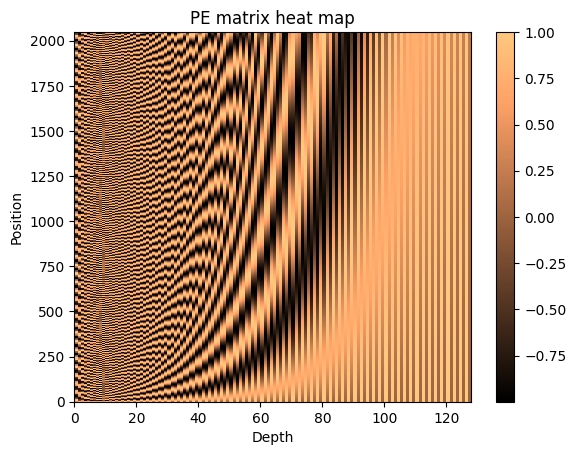

In [4]:
def positional_encoding(max_position, d_model, min_freq=1e-4):
    position = np.arange(max_position)
    freqs = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    return pos_enc

### Plotting ####
d_model = 128
max_pos = 2048
mat = positional_encoding(max_pos, d_model)
plt.pcolormesh(mat, cmap='copper')
plt.xlabel('Depth')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.title("PE matrix heat map")
plt.colorbar()
plt.show()

In [5]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=2048, dropout_prob=0.1):
        super().__init__()

        self.dropout = nn.Dropout(p=dropout_prob)

        position = torch.arange(max_len).unsqueeze(1)
        exp_term = torch.arange(0, d_model, 2)
        div_term = torch.exp(exp_term * (-math.log(10000.0) / d_model))
        pe = torch.zeros(1, max_len, d_model)
        pe[0, :, 0::2] = torch.sin(position * div_term)
        pe[0, :, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe) # Save the model and load them correctly

    def forward(self, x):
        # x.shape: N X T X D
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)

## Encoder

![](https://www.researchgate.net/publication/334288604/figure/fig1/AS:778232232148992@1562556431066/The-Transformer-encoder-structure.ppm)

![](https://github.com/eulerianKnight/images/blob/main/generative_ai_session/encoder_module.drawio.png?raw=true)



In [6]:
class TransformerBlock(nn.Module):
    def __init__(self, d_k, d_model, n_heads, dropout_prob=0.1):
        super().__init__()

        self.ln1 = nn.LayerNorm(d_model)
        self.ln2 = nn.LayerNorm(d_model)
        self.mha = MultiHeadAttention(d_k, d_model, n_heads)
        self.ann = nn.Sequential(
            nn.Linear(d_model, d_model * 4),
            nn.GELU(),
            nn.Linear(d_model * 4, d_model),
            nn.Dropout(dropout_prob),
        )
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x, mask=None):
        x = self.ln1(x + self.mha(x, x, x, mask))
        x = self.ln2(x + self.ann(x))
        x = self.dropout(x)
        return x

In [7]:
class Encoder(nn.Module):
    def __init__(self,
                 vocab_size,
                 max_len,
                 d_k,
                 d_model,
                 n_heads,
                 n_layers,
                 n_classes,
                 dropout_prob):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, max_len, dropout_prob)
        transformer_blocks = [
            TransformerBlock(
                d_k,
                d_model,
                n_heads,
                dropout_prob
            ) for _ in range(n_layers)
        ]
        self.transformer_blocks = nn.Sequential(*transformer_blocks)
        self.ln = nn.LayerNorm(d_model)
        self.fc = nn.Linear(d_model, n_classes)

    def forward(self, x, mask=None):
        x = self.embedding(x)
        x = self.pos_encoding(x)
        for block in self.transformer_blocks:
            x = block(x, mask)

        # Many-to-one (x has the shape N X T X D)
        x = x[:, 0, :]

        x = self.ln(x)
        x = self.fc(x)
        return x

In [8]:
# Sanity check
model = Encoder(vocab_size=20_000,
                max_len=1024,
                d_k=16,
                d_model=64,
                n_heads=4,
                n_layers=2,
                n_classes=5,
                dropout_prob=0.1)
model.to(device)

Encoder(
  (embedding): Embedding(20000, 64)
  (pos_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_blocks): Sequential(
    (0): TransformerBlock(
      (ln1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (mha): MultiHeadAttention(
        (key): Linear(in_features=64, out_features=64, bias=True)
        (query): Linear(in_features=64, out_features=64, bias=True)
        (value): Linear(in_features=64, out_features=64, bias=True)
        (fc): Linear(in_features=64, out_features=64, bias=True)
      )
      (ann): Sequential(
        (0): Linear(in_features=64, out_features=256, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=256, out_features=64, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (ln1): LayerNorm((64,), eps=1e-05, 

In [9]:
x = np.random.randint(0, 20_000, size=(8, 512))
x_t = torch.tensor(x).to(device)

In [10]:
mask = np.ones((8, 512))
mask[:, 256:] = 0
mask_t = torch.tensor(mask).to(device)

In [11]:
y = model(x_t, mask_t)

In [12]:
y.shape

torch.Size([8, 5])

In [13]:
checkpoint = 'distilbert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [14]:
raw_datasets = load_dataset('glue', 'sst2')
raw_datasets

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [15]:
raw_datasets['train']['sentence'][10]

'goes to absurd lengths '

In [15]:
def tokenize_fn(batch):
    return tokenizer(batch['sentence'], truncation=True)

In [16]:
tokenized_datasets = raw_datasets.map(tokenize_fn, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [17]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 1821
    })
})

In [18]:
data_collator

DataCollatorWithPadding(tokenizer=DistilBertTokenizerFast(name_or_path='distilbert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}, padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')

In [19]:
tokenized_datasets = tokenized_datasets.remove_columns(['sentence', 'idx'])
tokenized_datasets = tokenized_datasets.rename_column('label', 'labels')

In [20]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 872
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 1821
    })
})

In [21]:
train_loader = DataLoader(
    tokenized_datasets['train'],
    shuffle=True,
    batch_size=32,
    collate_fn=data_collator
)
valid_loader = DataLoader(
    tokenized_datasets['validation'],
    batch_size=32,
    collate_fn=data_collator
)

In [22]:
# Check its working
for batch in train_loader:
    for k, v in batch.items():
        print(f"k: {k}, Shape of v: {v.shape}")
    break

k: labels, Shape of v: torch.Size([32])
k: input_ids, Shape of v: torch.Size([32, 53])
k: attention_mask, Shape of v: torch.Size([32, 53])


In [23]:
set(tokenized_datasets['train']['labels'])

{0, 1}

In [24]:
tokenizer.vocab_size

28996

In [28]:
# Instantiate the model
model = Encoder(
    vocab_size=tokenizer.vocab_size,
    max_len=512,
    d_k=16,
    d_model=64,
    n_heads=4,
    n_layers=2,
    n_classes=2,
    dropout_prob=0.1
)
model.to(device)

Encoder(
  (embedding): Embedding(28996, 64)
  (pos_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_blocks): Sequential(
    (0): TransformerBlock(
      (ln1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (mha): MultiHeadAttention(
        (key): Linear(in_features=64, out_features=64, bias=True)
        (query): Linear(in_features=64, out_features=64, bias=True)
        (value): Linear(in_features=64, out_features=64, bias=True)
        (fc): Linear(in_features=64, out_features=64, bias=True)
      )
      (ann): Sequential(
        (0): Linear(in_features=64, out_features=256, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=256, out_features=64, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (ln1): LayerNorm((64,), eps=1e-05, 

In [29]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [30]:
# Function to encapsulate the training
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for iteration in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = 0
        n_train = 0
        for batch in train_loader:
            # Move back to GPU
            batch = {k: v.to(device) for k, v in batch.items()}
            # Zero the parameter gradient
            optimizer.zero_grad()
            # Forward pass
            outputs = model(batch['input_ids'], batch['attention_mask'])
            loss = criterion(outputs, batch['labels'])
            # Backward pass
            loss.backward()
            optimizer.step()

            train_loss += loss.item()*batch['input_ids'].size(0)
            n_train += batch['input_ids'].size(0)

        # Get Average Train loss
        train_loss = train_loss / n_train

        model.eval()
        test_loss = 0
        n_test = 0
        for batch in valid_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(batch['input_ids'], batch['attention_mask'])
            loss = criterion(outputs, batch['labels'])
            test_loss += loss.item()*batch['input_ids'].size(0)
            n_test += batch['input_ids'].size(0)
        test_loss = test_loss / n_test

        # Save Losses
        train_losses[iteration] = train_loss
        test_losses[iteration] = test_loss

        dt = datetime.now() - t0
        print(f"Epoch {iteration + 1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}")
    return train_losses, test_losses

In [31]:
train_losses, test_losses = train(
    model, criterion, optimizer, train_loader, valid_loader, epochs=4)

Epoch 1/4, Train Loss: 0.5343, Test Loss: 0.4867, Duration: 0:00:13.621519
Epoch 2/4, Train Loss: 0.3657, Test Loss: 0.4565, Duration: 0:00:13.421060
Epoch 3/4, Train Loss: 0.2996, Test Loss: 0.4621, Duration: 0:00:13.493551
Epoch 4/4, Train Loss: 0.2558, Test Loss: 0.5151, Duration: 0:00:13.471259


In [32]:
# Accuracy
model.eval()
n_correct = 0.
n_total = 0.
for batch in train_loader:
    # Move to GPU
    batch = {k: v.to(device) for k, v in batch.items()}
    # Forward Pass
    outputs = model(batch['input_ids'], batch['attention_mask'])
    # Get Prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # Update COunts
    n_correct += (predictions == batch['labels']).sum().item()
    n_total += batch['labels'].shape[0]


train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for batch in train_loader:
    # Move to GPU
    batch = {k: v.to(device) for k, v in batch.items()}
    # Forward Pass
    outputs = model(batch['input_ids'], batch['attention_mask'])
    # Get Prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # Update COunts
    n_correct += (predictions == batch['labels']).sum().item()
    n_total += batch['labels'].shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9290, Test acc: 0.9290


## Decoder

- Predict the next token in a sequence using only previous tokens.
- "The quick brown fox jumps over the lazy ___" (target: dog)
- Each document turns into multiple effective samples.
    - "the" → "quick"
    - "the quick" → "brown"
    - "the quick brown" → "fox"
- i.e. We are modeling p(x(t)|x(t-1), x(t-2),...,x(1))
- Why this task?
    - Consider use cases for sequence-to-sequence (chatbot, translation)
    - In both cases, we need to generate text.
    - For a chatbot, the encoder would process the prompt, and the decoder would take the encoder's output as input.
    - For translation, the encoder would process the input sentence.
    - In both cases, after reading the encoder's output, we generate text.
    - In a decoder-only model, don't condition on input (except past tokens).
    - A Decoder by itself can do amazing things. (e.g. GPT-2, GPT-3)
    - We can design a prompt such that the model acts as a chatbot/translator, without training specifically for those tasks.

- Main Difference: Causal Self-Attention
    - The "Transformer Block" uses Attention with "Masking".
    - We technically don't need masking to build Causal Language Model.
    - No masking needed - the input itself only contains the past tokens.
    - We can enforce "causality" by generating the inputs/targets appropriately.
    - Can we force

In [33]:
class CausalSelfAttention(nn.Module):
    def __init__(self,
                 d_k,
                 d_model,
                 n_heads,
                 max_len):
        super().__init__()
        # Assume d_v = d_k
        self.d_k = d_k
        self.n_heads = n_heads

        self.key = nn.Linear(d_model, d_k * n_heads)
        self.query = nn.Linear(d_model, d_k * n_heads)
        self.value = nn.Linear(d_model, d_k * n_heads)

        # Final Linear Layer
        self.fc = nn.Linear(d_k * n_heads, d_model)

        # Causal Mask
        # Make it such that the diagonal is 0
        # This way we dont have to shift inputs to make targets
        cm = torch.tril(torch.ones(max_len, max_len))
        self.register_buffer(
            'causal_mask',
            cm.view(1, 1, max_len, max_len)
        )

    def forward(self, q, k, v, pad_mask=None):
        q = self.query(q) # N X T X (hd_k)
        k = self.key(k) # N X T X (hd_k)
        v = self.value(v) # N X T X (hd_y)

        N = q.shape[0]
        T = q.shape[1]

        # Change the shape to:
        # (N, T, h, d_k) -> (N, h, T, d_k)
        # In order for matrix multiply to work properly
        q = q.view(N, T, self.n_heads, self.d_k).transpose(1, 2)
        k = k.view(N, T, self.n_heads, self.d_k).transpose(1, 2)
        v = v.view(N, T, self.n_heads, self.d_k).transpose(1, 2)

        # Compute attention Weights
        # (N, h, T, d_k) X (N, h, d_k, T) --> (N, h, T, T)
        attn_scores = q @ k.transpose(-2, -1) / math.sqrt(self.d_k)
        if pad_mask is not None:
            attn_scores = attn_scores.masked_fill(
                pad_mask[:, None, None, :] == 0, float('-inf')
            )
        attn_scores = attn_scores.masked_fill(
            self.causal_mask[:, :, :T, :T] == 0, float('-inf')
        )
        attn_weights = F.softmax(attn_scores, dim=-1)

        # Compute Attention-weighted values
        # (N, h, T, T) X (N, h, T, d_k) --> (N, h, T, d_k)
        A = attn_weights @ v
        # Reshape it back before final linear layer
        A = A.transpose(1, 2) # (N, T, h, d_k)
        A = A.contiguous().view(N, T, self.d_k * self.n_heads) # (N, T, h*d_k)

        # Projection
        return self.fc(A)

In [34]:
class DecoderTransformerBlock(nn.Module):
    def __init__(self, d_k, d_model, n_heads, max_len, dropout_prob=0.1):
        super().__init__()
        self.ln1 = nn.LayerNorm(d_model)
        self.ln2 = nn.LayerNorm(d_model)
        self.mha = CausalSelfAttention(d_k, d_model, n_heads, max_len)
        self.ann = nn.Sequential(
            nn.Linear(d_model, d_model * 4),
            nn.GELU(),
            nn.Linear(d_model * 4, d_model),
            nn.Dropout(dropout_prob)
        )
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x, pad_mask=None):
        x = self.ln1(x + self.mha(x, x, x, pad_mask))
        x = self.ln2(x + self.ann(x))
        x = self.dropout(x)
        return x

In [35]:
class Decoder(nn.Module):
    def __init__(self,
                 vocab_size,
                 max_len,
                 d_k,
                 d_model,
                 n_heads,
                 n_layers,
                 dropout_prob):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, max_len, dropout_prob)
        transformer_blocks = [
            DecoderTransformerBlock(d_k, d_model, n_heads, max_len, dropout_prob) for _ in range(n_layers)
        ]
        self.transformer_blocks = nn.Sequential(*transformer_blocks)
        self.ln = nn.LayerNorm(d_model)
        self.fc = nn.Linear(d_model, vocab_size)

    def forward(self, x, pad_mask=None):
        x = self.embedding(x)
        x = self.pos_encoding(x)
        for block in self.transformer_blocks:
            x = block(x, pad_mask)
        x = self.ln(x)
        x = self.fc(x) # Many-to-Many
        return x

In [36]:
# Sanity check
model = Decoder(20_000, 1024, 16, 64, 4, 2, 0.1)
model.to(device)

Decoder(
  (embedding): Embedding(20000, 64)
  (pos_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_blocks): Sequential(
    (0): DecoderTransformerBlock(
      (ln1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (mha): CausalSelfAttention(
        (key): Linear(in_features=64, out_features=64, bias=True)
        (query): Linear(in_features=64, out_features=64, bias=True)
        (value): Linear(in_features=64, out_features=64, bias=True)
        (fc): Linear(in_features=64, out_features=64, bias=True)
      )
      (ann): Sequential(
        (0): Linear(in_features=64, out_features=256, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=256, out_features=64, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): DecoderTransformerBlock(
      (ln1): LayerNorm((64

In [37]:
x = np.random.randint(0, 20_000, size=(8, 512))
x_t = torch.tensor(x).to(device)

In [38]:
y = model(x_t)
y.shape

torch.Size([8, 512, 20000])

In [39]:
mask = np.ones((8, 512))
mask[:, 256:] = 0
mask_t = torch.tensor(mask).to(device)

In [40]:
y = model(x_t, mask_t)
y.shape

torch.Size([8, 512, 20000])

In [41]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [42]:
tokenized_datasets = raw_datasets.map(tokenize_fn, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
tokenized_datasets

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 1821
    })
})

In [43]:
tokenized_datasets = tokenized_datasets.remove_columns(
    ['sentence', 'idx', 'label']
)

In [44]:
train_loader = DataLoader(
    tokenized_datasets['train'],
    shuffle=True,
    batch_size=32,
    collate_fn=data_collator
)

In [45]:
# Check
for batch in train_loader:
    for k, v in batch.items():
        print(f"k: {k}, Shape of v: {v.shape}")
    break

k: input_ids, Shape of v: torch.Size([32, 40])
k: attention_mask, Shape of v: torch.Size([32, 40])


In [46]:
tokenizer.pad_token_id

0

In [49]:
model = Decoder(
    vocab_size=tokenizer.vocab_size,
    max_len=512,
    d_k=16,
    d_model=64,
    n_heads=4,
    n_layers=2,
    dropout_prob=0.1
)
model.to(device)

Decoder(
  (embedding): Embedding(28996, 64)
  (pos_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_blocks): Sequential(
    (0): DecoderTransformerBlock(
      (ln1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (mha): CausalSelfAttention(
        (key): Linear(in_features=64, out_features=64, bias=True)
        (query): Linear(in_features=64, out_features=64, bias=True)
        (value): Linear(in_features=64, out_features=64, bias=True)
        (fc): Linear(in_features=64, out_features=64, bias=True)
      )
      (ann): Sequential(
        (0): Linear(in_features=64, out_features=256, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=256, out_features=64, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): DecoderTransformerBlock(
      (ln1): LayerNorm((64

In [50]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)
optimizer = torch.optim.Adam(model.parameters())

In [51]:
# Function for training loop
def train(model,
          criterion,
          optimizer,
          train_loader,
          epochs):
    train_losses = np.zeros(epochs)

    for iteration in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        for batch in train_loader:
            # Move data to GPU
            batch = {k: v.to(device) for k, v in batch.items()}
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Shift targets backwards
            targets = batch['input_ids'].clone().detach()
            targets = torch.roll(targets, shifts=-1, dims=1)
            targets[:, -1] = tokenizer.pad_token_id

            # Forward pass
            outputs = model(batch['input_ids'], batch['attention_mask'])
            # Outputs are N X T X V
            # But PyTorch expects N X V T
            loss = criterion(outputs.transpose(2, 1), targets)
            # Backward and Optimize
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())

        # Get train and test loss
        train_loss = np.mean(train_loss)

        # Save Losses
        train_losses[iteration] = train_loss

        dt = datetime.now() - t0
        print(f"Epoch {iteration + 1}/{epochs}, Train Loss: {train_loss:.4f}, Duration: {dt}")
    return train_losses

In [52]:
train_losses = train(
    model, criterion, optimizer, train_loader, epochs=15
)

Epoch 1/15, Train Loss: 5.9678, Duration: 0:00:29.376886
Epoch 2/15, Train Loss: 5.0181, Duration: 0:00:29.375079
Epoch 3/15, Train Loss: 4.6796, Duration: 0:00:29.290617
Epoch 4/15, Train Loss: 4.4916, Duration: 0:00:29.272599
Epoch 5/15, Train Loss: 4.3579, Duration: 0:00:29.198792
Epoch 6/15, Train Loss: 4.2510, Duration: 0:00:29.119832
Epoch 7/15, Train Loss: 4.1613, Duration: 0:00:29.127998
Epoch 8/15, Train Loss: 4.0855, Duration: 0:00:29.165619
Epoch 9/15, Train Loss: 4.0193, Duration: 0:00:29.214283
Epoch 10/15, Train Loss: 3.9580, Duration: 0:00:29.208862
Epoch 11/15, Train Loss: 3.9013, Duration: 0:00:29.183549
Epoch 12/15, Train Loss: 3.8495, Duration: 0:00:29.261025
Epoch 13/15, Train Loss: 3.8025, Duration: 0:00:29.259578
Epoch 14/15, Train Loss: 3.7618, Duration: 0:00:29.157201
Epoch 15/15, Train Loss: 3.7209, Duration: 0:00:29.177458


In [53]:
valid_loader = DataLoader(
    tokenized_datasets['validation'],
    batch_size=1,
    collate_fn=data_collator
)

In [54]:
model.eval()
for batch in valid_loader:
    # Move data to GPU
    batch = {k: v.to(device) for k, v in batch.items()}
    outputs = model(batch['input_ids'], batch['attention_mask'])
    break

In [55]:
outputs.shape

torch.Size([1, 12, 28996])

In [56]:
torch.argmax(outputs, axis=-1)

tensor([[ 170,  112,  188,  170, 4105, 1105, 6276, 6276, 2025,  102,  102,  102]],
       device='cuda:0')

In [57]:
prediction_ids = torch.argmax(outputs, axis=-1)

In [58]:
tokenizer.decode(prediction_ids[0])

"a's a sweet and funny funny study [SEP] [SEP] [SEP]"

In [59]:
tokenizer.decode(batch['input_ids'][0])

"[CLS] it's a charming and often affecting journey. [SEP]"

In [60]:
tokenizer.decode(torch.concat((batch['input_ids'][0, :5], prediction_ids[:, 4])))

"[CLS] it's a sweet"

In [61]:
# Generate Something
prompt = "it's"

tokenized_prompt = tokenizer(prompt, return_tensors='pt')
tokenized_prompt

{'input_ids': tensor([[ 101, 1122,  112,  188,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [62]:
outputs = model(
    tokenized_prompt['input_ids'][:, :-1].to(device),
    tokenized_prompt['attention_mask'][:, :-1].to(device)
)
outputs.shape

torch.Size([1, 4, 28996])

In [63]:
prediction_ids = torch.argmax(outputs[:, -1, :], axis=-1)

In [64]:
tokenizer.decode(prediction_ids[0])

'a'

## Encoder-Decoder Transformer

![](https://github.com/eulerianKnight/images/blob/main/generative_ai_session/encoder_decoder.drawio.png?raw=true)

- A Transformer is made up of Encoder connected to Decoder.
- Decoder Transformer block is different than Encoder transformer block.
    - Specifically, it has an extra Multi-Head Attention Layer.
    - The first "Multi-Head Attention" in the Decoder is the "Causal Self Attention" using a Mask.
    - The second "Multi-Head Attention" is just a regular Self-Attention. - It takes an input from the encoder output.
    - Encoder output becomes V and K for the decoder while Q comes from previous Attention.

- How does the connection work?

Suppose, V has size $T_{input}×d_v$, K has size $T_{input}×d_k$. Q has size $T_{output}×d_k$.

$QK^T → (T_{output} × d_k)×(d_k × T_{input}) → T_{output}×T_{input}$

Scaling and softmax don't change the shape.
Attention weights have shape $(T_{output} × T_{input})$

α(i,j) = how much output i pays attention to input j.

- How are they connected?

![](https://github.com/eulerianKnight/images/blob/main/generative_ai_session/encoder-decoder-connection.drawio.png?raw=true)




## Complexity in Transformers

![](https://miro.medium.com/v2/resize:fit:1302/0*IOh4mUYh8AtH3bjp.png)

- Every word must have an attention weight with every other word.
- Attention on sequence of length L takes $L^2$ time and memory.

| $L$    | $L^2$|  Time for computation |
|--------|:-----|:----------------------|
| 100    | 10K  | 0.001s at 10M ops/s   |
| 1000   | 1M   | 0.1s at 10M ops/s     |
| 10000  | 100M | 10s at 10M ops/s      |
| 100000 | 10B  | 1000s at 10M ops/s    |

- N layers take N times as much memory.
    - GPT-3 has 96 layers and new models have more than that.


## Sparse Transformer

- What is sparsity and why does it matter?
    - Usually, softmax is used for attention, and softmax produces a dense vector.
    - For better interpretability, we want to get a sparse vector i.e only focus on important information.

### Generating Long sequences with Sparse Transformers

- Paper Link: https://arxiv.org/abs/1904.10509

#### Main Points.

- Reduces complexity of self-attention from $O(n^2)$ to $O(n√n)$.
- Variational Architecture Initialization.


![](https://miro.medium.com/v2/resize:fit:1400/1*_w-ubdJWFKuiK1BANsMIYw.png)

### Sparse is enough in Scaling Transformers

- Paper link: https://arxiv.org/abs/2111.12763

## Reformer: The Efficient Transformer

- Paper link: https://arxiv.org/abs/2001.04451



## Longformer: The Long-Document Transformer

- Paper link: https://arxiv.org/abs/2004.05150

## BERT(Bidirectional Encoder Representation for Transformers)

- Paper link: https://arxiv.org/abs/1810.04805

![](https://miro.medium.com/v2/resize:fit:1400/1*p4LFBwyHtCw_Qq9paDampA.png)

- Encoder Only Model.

### Training BERT

- Unsupervised pretraining + Fine-Tuning.
- Pretraining tasks: Masked Language Modelling(MLM) + Next Sentence Prediction.
- Generating MLM Dataset:
    - For each token, 15% chance of being selected for prediction of these:
        - 80% chance of being replaced with [MASK]
        - 10% chance of being replaced with random word.
        - 10% chance of remaining unchanged.
- For NSP, sentences can contain masks as well. e.g
    [CLS] Bob went to the park. [SEP] Bob is [MASK] the park. [SEP]
- NSP uses a balanced dataset (50/50 split design IsNext/IsNotNext classes.)
- Dataset:
    - BookCorpus(800M Words) + English Wikipedia (2.5B Words)


## GPT(Generative Pre-Trained Transformer)

- Paper Link: https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf

![](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-27_at_12.41.44_PM.png)

- All GPTs are Decoder Only Model.
- Pretrain with unsupervised task: "Predict next token given previous tokens."
- Authors described lack of labeled data as a "bottleneck", and present GPT as a way around this "bottleneck" because it can learn useful things by leveraging *unlabeled data*.
- Despite the simplicity of this task, it can still do amazing things.
- All transformer blocks use "Causal Self-Attention". There are 12 Transformer blocks.

### Fine-Tuning with Auxiliary Language Model

$L_3(C) = L_2(C) + λ * L_1(C)$

where,
    $L_3(C)$ is overall loss, $L_2(C)$ is Task-Specific Loss, λ is Balancing Constant, $L_1(C)$ is Language Model loss.

### Specifics

- Dataset: BooksCorpus
- Number of Parameters: 110 Million
- Context size: 512


## GPT-2

- Paper Link: https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf

- For the first time, ML was able to generate long strings of coherent text.
- No fine-tuning for downstream tasks.
- It was able to do translation, summarization, and more only by "predicting the next token in a sequence."
- GPT-2 simply tries to guess "what comes next".

### Prompting.

- For summarization, input "text to summarize TL;DR:". GPT-2 then naturally produces a summary.
- Why? The dataset used for pretraining was internet data. People generally use this syntax when summarizing theor posts.
- Prompt for language translation: "< en sent1 > = < fr sent1 >, < en sent2 >= < fr sent2 >....< en sent N >="
- Inputs are just words - there's a lot of flexibility in how to format prompt. E.g "Translate English to French: I am lazy\n"

### Specifics

- Number of Parameters: 1.5 billion params.
- Context size: 1024
- Dataset:
    - Tested CommonCrawl(Whole Internet data), but found quality issues.
    - Created WebText - links from Reddit with 3+ karma(upvotes)
    - 8 million documents, 40 GB of data.

## GPT-3

- Paper link: https://arxiv.org/abs/2005.14165

- Number of Parameters: 175 Billion
- Context size: 2048
- Dataset:
    - CommonCrawl(filtered): 410 billion Tokens. 60%
    - WebText2: 19 billion Tokens. 22%
    - Books1: 12 Billion Tokens. 8%
    - Books2: 55 Billion Tokens. 8%
    - Wokipedia: 3 Billion Tokens. 3%
- No Fine-Tuning

![](https://i0.wp.com/kikaben.com/wp-content/uploads/2023/01/image.png?resize=960%2C406&ssl=1)

### Zero-Shot, One-Shot, Few-shot

- GPT-2 uses Zero-shot only.
- GPT-3 uses Zero-shot, One-Shot, Few-Shot.

![](https://i0.wp.com/kikaben.com/wp-content/uploads/2023/01/image-3.png?resize=4568%2C4248&ssl=1)

### Compute Scaling

![](https://blogs.nvidia.com/wp-content/uploads/2022/10/Compute-for-Training-LLMs-GPT3-paper.jpg)



## ChatGPT

- Conversational AI developed by OpenAI
- Based on GPT-3.5

### Training

- Start with GPT-3.5 as a base.
- Based on Reinforcement Learning from Human Feedback (RLHF)
- Start with supervised fine-tuning
- Reward model comprised of ranked responses.
- Fine-tuned using Proximal Policy Optimization(PPO)
- Trained on Azure AI SuperComputing Infrastructure.

### Limitations of ChatGPT

- Produces answers that sound plausible but incorrect/nonsensical.
- Can decline to answer even if it knows the answer.
- Sensitivity to input phrasing.
- Excessively Verbose.
- Does not clarify ambiguous queries.
- May still respond to harmful instructions or exhibit bias.



## GPT-4

- Multimodal: Text and Images.
- Improvement over many metrics:
    - Beats most humans on SAT, LSAT, bar exam.
    - Traditional NLP Benchmark.
- Context size: 8192 tokens
- Another verison has 32k tokens.